In [ ]:
#loading the basic necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
#checking for correlation between the features and the target
train.corr()


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
timestamp,1.000000,0.534376,0.534272,0.534501,0.534386,0.237101,0.272706,0.286741,0.231311,0.265828,0.005468
open,0.534376,1.000000,0.999994,0.999994,0.999992,0.205516,0.427065,0.390715,0.203129,0.419227,-0.004030
high,0.534272,0.999994,1.000000,0.999989,0.999995,0.206893,0.428565,0.392173,0.204721,0.420968,-0.003995
low,0.534501,0.999994,0.999989,1.000000,0.999995,0.203911,0.425314,0.389095,0.201869,0.417871,-0.004087
close,0.534386,0.999992,0.999995,0.999995,1.000000,0.205389,0.426929,0.390649,0.203450,0.419604,-0.004100
volume,0.237101,0.205516,0.206893,0.203911,0.205389,1.000000,0.848345,0.795536,0.963362,0.814487,0.015103
quote_asset_volume,0.272706,0.427065,0.428565,0.425314,0.426929,0.848345,1.000000,0.895895,0.818933,0.963957,0.012075
number_of_trades,0.286741,0.390715,0.392173,0.389095,0.390649,0.795536,0.895895,1.000000,0.769869,0.866840,0.014019
taker_buy_base_volume,0.231311,0.203129,0.204721,0.201869,0.203450,0.963362,0.818933,0.769869,1.000000,0.848061,0.013395
taker_buy_quote_volume,0.265828,0.419227,0.420968,0.417871,0.419604,0.814487,0.963957,0.866840,0.848061,1.000000,0.010717


In [ ]:
#creating a new calculated column
train['price_range'] = train['high'] - train['low']/train['open']

In [ ]:
#droping these columns cause of high correlation with other features
train.drop(['high','low','open','taker_buy_base_volume'],axis = 1, inplace = True)

In [ ]:
train.head()

,timestamp,close,volume,quote_asset_volume,number_of_trades,taker_buy_quote_volume,target,price_range
0,1525471260,0.90130,134.98,121.646459,4.0,112.723589,1.0,-0.098700
1,1525471320,0.90195,1070.54,965.505313,12.0,793.612703,0.0,-0.098050
2,1525471380,0.90139,2293.06,2066.963991,5.0,0.000000,0.0,-0.098589
3,1525471440,0.90139,6850.59,6175.000909,19.0,1610.149485,0.0,-0.098589
4,1525471500,0.90130,832.30,750.222624,3.0,707.428900,0.0,-0.098510


In [ ]:
#converting the format for the feature
train['timestamp'] = pd.to_datetime(train['timestamp'])

In [ ]:
train.head()

,timestamp,close,volume,quote_asset_volume,number_of_trades,taker_buy_quote_volume,target,price_range
0,1970-01-01 00:00:01.525471260,0.90130,134.98,121.646459,4.0,112.723589,1.0,-0.098700
1,1970-01-01 00:00:01.525471320,0.90195,1070.54,965.505313,12.0,793.612703,0.0,-0.098050
2,1970-01-01 00:00:01.525471380,0.90139,2293.06,2066.963991,5.0,0.000000,0.0,-0.098589
3,1970-01-01 00:00:01.525471440,0.90139,6850.59,6175.000909,19.0,1610.149485,0.0,-0.098589
4,1970-01-01 00:00:01.525471500,0.90130,832.30,750.222624,3.0,707.428900,0.0,-0.098510


In [ ]:
train.tail()

,timestamp,close,volume,quote_asset_volume,number_of_trades,taker_buy_quote_volume,target,price_range
2122433,1970-01-01 00:00:01.652817240,0.4304,136274.0,58630.1628,144.0,23325.9277,1.0,-0.567774
2122434,1970-01-01 00:00:01.652817300,0.4305,104478.0,44967.8376,99.0,22484.0304,1.0,-0.569300
2122435,1970-01-01 00:00:01.652817360,0.4309,212396.0,91526.9872,177.0,46673.0616,0.0,-0.568800
2122436,1970-01-01 00:00:01.652817420,0.4306,131047.0,56443.0038,107.0,14097.1489,0.0,-0.567276
2122437,1970-01-01 00:00:01.652817480,0.4301,101150.0,43542.2629,105.0,19851.7237,1.0,-0.568039


In [ ]:
#making sure that the dataset is not imbalanced
train['target'].value_counts()

0.0    1112614
1.0    1009824
Name: target, dtype: int64

In [ ]:
#creating moving average windows
for window in [5,10,20,30]:
  train[f'close_ma_{window}'] = train['close'].rolling(window = window).mean()
  train[f'close_std_{window}'] = train['close'].rolling(window = window).std()

In [ ]:
#creating lags in order to capture recent trends
for lag in range(1,6):
  train[f'close_lag_{lag}'] = train['close'].shift(lag)
  train[f'volume_lag_{lag}'] = train['volume'].shift(lag)
  train[f'quote_volume_lag_{lag}'] = train['quote_asset_volume'].shift(lag)

In [ ]:
train.head()

,timestamp,close,volume,quote_asset_volume,number_of_trades,taker_buy_quote_volume,target,price_range,close_ma_5,close_std_5,...,quote_volume_lag_2,close_lag_3,volume_lag_3,quote_volume_lag_3,close_lag_4,volume_lag_4,quote_volume_lag_4,close_lag_5,volume_lag_5,quote_volume_lag_5
0,1970-01-01 00:00:01.525471260,0.90130,134.98,121.646459,4.0,112.723589,1.0,-0.098700,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-01 00:00:01.525471320,0.90195,1070.54,965.505313,12.0,793.612703,0.0,-0.098050,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-01 00:00:01.525471380,0.90139,2293.06,2066.963991,5.0,0.000000,0.0,-0.098589,NaN,NaN,...,121.646459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-01 00:00:01.525471440,0.90139,6850.59,6175.000909,19.0,1610.149485,0.0,-0.098589,NaN,NaN,...,965.505313,0.90130,134.98,121.646459,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-01 00:00:01.525471500,0.90130,832.30,750.222624,3.0,707.428900,0.0,-0.098510,0.901466,0.000274,...,2066.963991,0.90195,1070.54,965.505313,0.9013,134.98,121.646459,NaN,NaN,NaN


In [ ]:
#making sure there are no nulls
train.dropna(inplace = True)

In [ ]:
train.head()

,timestamp,close,volume,quote_asset_volume,number_of_trades,taker_buy_quote_volume,target,price_range,close_ma_5,close_std_5,...,quote_volume_lag_2,close_lag_3,volume_lag_3,quote_volume_lag_3,close_lag_4,volume_lag_4,quote_volume_lag_4,close_lag_5,volume_lag_5,quote_volume_lag_5
29,1970-01-01 00:00:01.525473000,0.89571,446.13,400.511026,7.0,393.479663,1.0,-0.102135,0.896284,0.001562,...,13430.793297,0.89787,10914.10,9799.465432,0.89787,941.71,845.490906,0.89790,522.25,468.824943
30,1970-01-01 00:00:01.525473060,0.89787,14254.75,12796.739759,18.0,1261.653247,0.0,-0.102130,0.896284,0.001562,...,10638.856804,0.89427,15007.25,13430.793297,0.89787,10914.10,9799.465432,0.89787,941.71,845.490906
31,1970-01-01 00:00:01.525473120,0.89572,1318.45,1183.339181,5.0,0.000000,0.0,-0.099735,0.895854,0.001288,...,400.511026,0.89570,11877.72,10638.856804,0.89427,15007.25,13430.793297,0.89787,10914.10,9799.465432
32,1970-01-01 00:00:01.525473180,0.89570,1604.75,1437.376947,9.0,0.000000,0.0,-0.104258,0.896140,0.000967,...,12796.739759,0.89571,446.13,400.511026,0.89570,11877.72,10638.856804,0.89427,15007.25,13430.793297
33,1970-01-01 00:00:01.525473240,0.89445,6.92,6.197552,3.0,5.795050,1.0,-0.102947,0.895890,0.001234,...,1183.339181,0.89787,14254.75,12796.739759,0.89571,446.13,400.511026,0.89570,11877.72,10638.856804


In [ ]:
train.shape

(2122409, 31)

In [ ]:
!pip install ta

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#importing technical indicator libraries
from ta.momentum import RSIIndicator
from ta.trend import MACD, EMAIndicator
from ta.volatility import BollingerBands

In [ ]:
#adding these technical indicators as columns for our dataset after calculations
rsi = RSIIndicator(close=train['close'], window=14)
train['rsi'] = rsi.rsi()

macd = MACD(close=train['close'], window_slow=26, window_fast=12, window_sign=9)
train['macd'] = macd.macd()
train['macd_signal'] = macd.macd_signal()
train['macd_diff'] = macd.macd_diff()

bb = BollingerBands(close=train['close'], window=20, window_dev=2)
train['bb_mavg'] = bb.bollinger_mavg()
train['bb_high'] = bb.bollinger_hband()
train['bb_low'] = bb.bollinger_lband()
train['bb_width'] = train['bb_high'] - train['bb_low']

ema_10 = EMAIndicator(close=train['close'], window=10)
ema_30 = EMAIndicator(close=train['close'], window=30)
train['ema_10'] = ema_10.ema_indicator()
train['ema_30'] = ema_30.ema_indicator()
train['ema_diff'] = train['ema_10'] - train['ema_30']

train.fillna(method='ffill', inplace=True)



<AxesSubplot:xlabel='volume'>

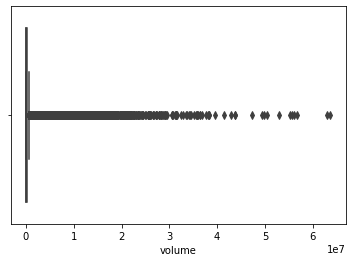

In [ ]:
sns.boxplot(train['volume'])

In [ ]:
#importing scaling libraries
from sklearn.preprocessing import RobustScaler, MinMaxScaler, QuantileTransformer, StandardScaler

In [ ]:
#segragating the columns in order to use different scaling methods based on the feature
price_cols = ['close', 'close_ma_5', 'close_std_5', 'close_lag_3', 'close_lag_4', 'close_lag_5']
volume_cols = ['volume', 'quote_asset_volume', 'taker_buy_quote_volume', 'volume_lag_2', 'quote_volume_lag_2', 'volume_lag_3', 'quote_volume_lag_3', 'volume_lag_4', 'quote_volume_lag_4', 'volume_lag_5', 'quote_volume_lag_5']
count_cols = ['number_of_trades']
derived_cols = ['price_range']

In [ ]:
scaler_price = RobustScaler()
train[price_cols] = scaler_price.fit_transform(train[price_cols])

In [ ]:
scaler_volume = QuantileTransformer(output_distribution='uniform')
train[volume_cols] = scaler_volume.fit_transform(train[volume_cols])

In [ ]:
scaler = RobustScaler()

# Scale the technical indicators
indicator_cols = ['rsi', 'macd', 'macd_signal', 'macd_diff',
                  'bb_mavg', 'bb_high', 'bb_low', 'bb_width',
                  'ema_10', 'ema_30', 'ema_diff']

# Fit and transform the indicators
train[indicator_cols] = scaler.fit_transform(train[indicator_cols])

In [ ]:
scaler_count = RobustScaler()
train[count_cols] = scaler_count.fit_transform(train[count_cols])


In [ ]:
scaler_derived = StandardScaler()
train[derived_cols] = scaler_derived.fit_transform(train[derived_cols])

In [ ]:
train.corr()

,close,volume,quote_asset_volume,number_of_trades,taker_buy_quote_volume,target,price_range,close_ma_5,close_std_5,close_ma_10,...,macd,macd_signal,macd_diff,bb_mavg,bb_high,bb_low,bb_width,ema_10,ema_30,ema_diff
close,1.000000,0.426095,0.621662,0.390660,0.607932,-0.004094,0.999973,0.999991,0.518567,0.999979,...,0.010645,0.011124,0.000672,0.999956,0.999903,0.999911,0.541722,0.999985,0.999952,0.010903
volume,0.426095,1.000000,0.961909,0.455200,0.914741,0.023198,0.428296,0.426111,0.440379,0.426118,...,0.000660,0.001540,-0.002535,0.426148,0.428730,0.423489,0.451688,0.426129,0.426166,0.000707
quote_asset_volume,0.621662,0.961909,1.000000,0.466815,0.955486,0.018436,0.623475,0.621678,0.484346,0.621683,...,0.001724,0.002618,-0.002364,0.621712,0.623606,0.619731,0.500165,0.621696,0.621734,0.001791
number_of_trades,0.390660,0.455200,0.466815,1.000000,0.460050,0.014017,0.394248,0.390778,0.725221,0.390831,...,-0.012388,-0.008248,-0.015024,0.390886,0.396371,0.385290,0.678465,0.390815,0.390908,-0.012610
taker_buy_quote_volume,0.607932,0.914741,0.955486,0.460050,1.000000,0.014626,0.609449,0.607825,0.477097,0.607820,...,0.003401,0.002354,0.003856,0.607847,0.609750,0.605859,0.493323,0.607844,0.607870,0.003623
target,-0.004094,0.023198,0.018436,0.014017,0.014626,1.000000,-0.003894,-0.003996,0.012693,-0.003942,...,-0.017848,-0.014565,-0.013515,-0.003876,-0.003718,-0.004036,0.011289,-0.003957,-0.003852,-0.018077
price_range,0.999973,0.428296,0.623475,0.394248,0.609449,-0.003894,1.000000,0.999979,0.522157,0.999970,...,0.009706,0.010495,-0.000457,0.999950,0.999934,0.999866,0.544902,0.999974,0.999947,0.009936
close_ma_5,0.999991,0.426111,0.621678,0.390778,0.607825,-0.003996,0.999979,1.000000,0.518711,0.999994,...,0.009809,0.010915,-0.001397,0.999974,0.999920,0.999927,0.541740,0.999996,0.999968,0.010027
close_std_5,0.518567,0.440379,0.484346,0.725221,0.477097,0.012693,0.522157,0.518711,1.000000,0.518984,...,-0.115706,-0.108376,-0.045317,0.519426,0.525725,0.512994,0.817569,0.518965,0.519652,-0.116949
close_ma_10,0.999979,0.426118,0.621683,0.390831,0.607820,-0.003942,0.999970,0.999994,0.518984,1.000000,...,0.007914,0.009875,-0.004367,0.999988,0.999936,0.999941,0.541842,0.999999,0.999982,0.008097


In [ ]:
#importing libraries required for random forest and metrics for evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score
train.dropna(inplace = True)

In [ ]:
#extract features from the DateTime
train['hour'] = train['timestamp'].dt.hour
train['minute'] = train['timestamp'].dt.minute
train['day'] = train['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday

#drop the original DateTime column if it is not needed
train.drop(columns=['timestamp'], inplace=True)


In [ ]:
#splitting the training data into predictors and target
x = train.drop('target', axis = 1)
y = train['target']

In [ ]:
#splitting x and y into training and validation sets
from sklearn.model_selection import train_test_split, GridSearchCV
train_size = 0.8
train_index = int(len(train) * train_size)
x_train, x_val = x[:train_index], x[train_index:]
y_train, y_val = y[:train_index], y[train_index:]

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1697900, 43), (424476, 43), (1697900,), (424476,))

In [ ]:
y_train.head()

62    0.0
63    0.0
64    0.0
65    0.0
66    0.0
Name: target, dtype: float64

In [ ]:
#making sure there are no nulls
x_train.isna().sum()

close                     0
volume                    0
quote_asset_volume        0
number_of_trades          0
taker_buy_quote_volume    0
price_range               0
close_ma_5                0
close_std_5               0
close_ma_10               0
close_std_10              0
close_ma_20               0
close_std_20              0
close_ma_30               0
close_std_30              0
close_lag_1               0
volume_lag_1              0
quote_volume_lag_1        0
close_lag_2               0
volume_lag_2              0
quote_volume_lag_2        0
close_lag_3               0
volume_lag_3              0
quote_volume_lag_3        0
close_lag_4               0
volume_lag_4              0
quote_volume_lag_4        0
close_lag_5               0
volume_lag_5              0
quote_volume_lag_5        0
rsi                       0
macd                      0
macd_signal               0
macd_diff                 0
bb_mavg                   0
bb_high                   0
bb_low              

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import pandas as pd
from time import time
import gc
from sklearn.utils.class_weight import compute_class_weight

#calculating class wrights
unique_classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train)
class_weight_dict = dict(zip(unique_classes, class_weights))

#hyper parameter grid
param_grid = {
    'n_estimators': [800, 1000, 1200, 1500, 2000],
    'max_depth': [15, 20, 25, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 15, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [0.2, 0.3, 0.4, 0.5, 0.6, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample', class_weight_dict],
    'max_samples': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'bootstrap': [True]
}

#base RF model
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    verbose=1,
    oob_score=True
)

#scoring based on f1
scorer = make_scorer(f1_score, average='macro')

#time series split with gap
tscv = TimeSeriesSplit(n_splits=5, gap=100)

print("Starting extensive hyperparameter search...")
start_time = time()

#randomised search through hyper parameters
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=35,  #couldnt look for more iterations than 20 cause of computation load
    cv=tscv,
    scoring=scorer,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

#fit on subset
subset_size = 500000
x_train_subset = x_train[-subset_size:] if isinstance(x_train, pd.DataFrame) else x_train[-subset_size:]
y_train_subset = y_train[-subset_size:] if isinstance(y_train, pd.Series) else y_train[-subset_size:]

random_search.fit(x_train_subset, y_train_subset)
print(f"\nOptimization completed in {(time() - start_time) / 60:.2f} minutes")

#best parameters
best_params = random_search.best_params_
print("\nBest Parameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

#clean up memory
del random_search, x_train_subset, y_train_subset
gc.collect()

#training the final model on the entire dataset
print("\nTraining final model on complete dataset...")
start_time = time()

#cobining the entire data
x_combined = pd.concat([x_train, x_val]) if isinstance(x_train, pd.DataFrame) else np.concatenate([x_train, x_val])
y_combined = pd.concat([y_train, y_val]) if isinstance(y_train, pd.Series) else np.concatenate([y_train, y_val])

#creating sample weights (temporal + class weights)
sample_weights = np.linspace(0.5, 1, len(y_combined))  # Time-based weights
class_weight_map = {k: v for k, v in zip(unique_classes, class_weights)}
class_weights_array = np.array([class_weight_map[y] for y in y_combined])
final_sample_weights = sample_weights * class_weights_array

#training the final model on best paras obtained
final_model = RandomForestClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    oob_score=True
)

final_model.fit(x_combined, y_combined, sample_weight=final_sample_weights)

print(f"\nFinal training completed in {(time() - start_time) / 60:.2f} minutes")
print(f"Out of bag score: {final_model.oob_score_:.4f}")

#saving the model
import joblib
model_filename = f'rf_model_extensive_{time():.0f}.joblib'
joblib.dump(final_model, model_filename)
print(f"\nModel saved as {model_filename}")

Starting extensive hyperparameter search...
Fitting 5 folds for each of 35 candidates, totalling 175 fits


In [ ]:
x_train.head()

In [ ]:
#converting the test data as per the feature engineering of the train data
test = pd.read_csv('test.csv')

test['price_range'] = test['high'] - test['low'] / test['open']
test.drop(['high', 'low', 'open', 'taker_buy_base_volume'], axis=1, inplace=True)
test['timestamp'] = pd.to_datetime(test['timestamp'])

for window in [5, 10, 20, 30]:
    test[f'close_ma_{window}'] = test['close'].rolling(window=window).mean()
    test[f'close_std_{window}'] = test['close'].rolling(window=window).std()

for lag in range(1, 6):
    test[f'close_lag_{lag}'] = test['close'].shift(lag)
    test[f'volume_lag_{lag}'] = test['volume'].shift(lag)
    test[f'quote_volume_lag_{lag}'] = test['quote_asset_volume'].shift(lag)

test.interpolate(method='linear', inplace=True)

rsi = RSIIndicator(close=test['close'], window=14)
test['rsi'] = rsi.rsi()

macd = MACD(close=test['close'], window_slow=26, window_fast=12, window_sign=9)
test['macd'] = macd.macd()
test['macd_signal'] = macd.macd_signal()
test['macd_diff'] = macd.macd_diff()

bb = BollingerBands(close=test['close'], window=20, window_dev=2)
test['bb_mavg'] = bb.bollinger_mavg()
test['bb_high'] = bb.bollinger_hband()
test['bb_low'] = bb.bollinger_lband()
test['bb_width'] = test['bb_high'] - test['bb_low']

ema_10 = EMAIndicator(close=test['close'], window=10)
ema_30 = EMAIndicator(close=test['close'], window=30)
test['ema_10'] = ema_10.ema_indicator()
test['ema_30'] = ema_30.ema_indicator()
test['ema_diff'] = test['ema_10'] - test['ema_30']

test.fillna(method='ffill', inplace=True)


test.fillna(method='bfill', inplace=True)

test.fillna(test.mean(), inplace=True)


test['hour'] = test['timestamp'].dt.hour
test['minute'] = test['timestamp'].dt.minute
test['day'] = test['timestamp'].dt.dayofweek


test.drop(columns=['timestamp'], inplace=True)


price_cols = ['close', 'close_ma_5', 'close_std_5', 'close_lag_3', 'close_lag_4', 'close_lag_5']
volume_cols = ['volume', 'quote_asset_volume', 'taker_buy_quote_volume', 'volume_lag_2', 'quote_volume_lag_2', 'volume_lag_3', 'quote_volume_lag_3', 'volume_lag_4', 'quote_volume_lag_4', 'volume_lag_5', 'quote_volume_lag_5']
count_cols = ['number_of_trades']
derived_cols = ['price_range']


scaler_price = RobustScaler()
test[price_cols] = scaler_price.fit_transform(test[price_cols])

scaler_volume = QuantileTransformer(output_distribution='uniform')
test[volume_cols] = scaler_volume.fit_transform(test[volume_cols])

scaler_indicator = RobustScaler()
indicator_cols = ['rsi', 'macd', 'macd_signal', 'macd_diff', 'bb_mavg', 'bb_high', 'bb_low', 'bb_width', 'ema_10', 'ema_30', 'ema_diff']
test[indicator_cols] = scaler_indicator.fit_transform(test[indicator_cols])

scaler_count = RobustScaler()
test[count_cols] = scaler_count.fit_transform(test[count_cols])

scaler_derived = StandardScaler()
test[derived_cols] = scaler_derived.fit_transform(test[derived_cols])


In [ ]:
test.drop('row_id',axis = 1, inplace = True)

In [ ]:
test_2 = pd.read_csv("test.csv")

In [ ]:
#making predictions
predictions = model.predict(test)

In [ ]:
#making sure that the predictions are of the correct shape
predictions.shape

In [ ]:
#creating a dataframe based on the predictions
predictions_df = pd.DataFrame({
    'row_id': test_2['row_id'],
    'target': predictions
})

predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")